# Modelling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from lightgbm import LGBMRegressor

In [2]:
DATA_DIR = '../data'

In [3]:
data = pd.read_csv("{}/interim/all_data.csv".format(DATA_DIR))

In [4]:
df = data[~pd.isnull(data['euro_score'])]

In [5]:
train = df[df['date'] < "2020-10-01"]
val = df[df['date'] >= "2020-10-01"]
test = data[pd.isnull(data['euro_score'])]

In [6]:
train.shape

(4352, 83)

In [7]:
val.shape

(2695, 83)

In [8]:
test.shape

(1052, 83)

In [9]:
train.head()

,player_name,date,league_name,team_name,opponent_name,position,euro_score,prev_mean_euro_score,prev_mean_goals,prev_mean_assists,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,Aaron Ramsey,2018-09-06 00:00:00,UEFA Nations League,Wales,Republic of Ireland,M,8.0,NaN,NaN,NaN,...,81.0,75.0,81.0,72.0,68.0,6.0,11.0,5.0,10.0,8.0
1,Aaron Ramsey,2018-09-09 00:00:00,UEFA Nations League,Wales,Denmark,M,3.0,8.000000,1.0,0.0,...,81.0,75.0,81.0,72.0,68.0,6.0,11.0,5.0,10.0,8.0
2,Aaron Ramsey,2018-10-11 00:00:00,International Friendlies,Wales,Spain,M,3.0,5.500000,0.5,0.0,...,81.0,75.0,81.0,72.0,68.0,6.0,11.0,5.0,10.0,8.0
3,Aaron Ramsey,2018-11-16 00:00:00,UEFA Nations League,Wales,Denmark,M,3.0,4.666667,0.0,0.0,...,81.0,75.0,81.0,72.0,68.0,6.0,11.0,5.0,10.0,8.0
4,Aaron Ramsey,2018-11-20 00:00:00,International Friendlies,Wales,Albania,M,1.0,4.250000,0.0,0.0,...,81.0,75.0,81.0,72.0,68.0,6.0,11.0,5.0,10.0,8.0


In [10]:
train.columns

Index(['player_name', 'date', 'league_name', 'team_name', 'opponent_name',
       'position', 'euro_score', 'prev_mean_euro_score', 'prev_mean_goals',
       'prev_mean_assists', 'prev_median_min', 'prev_starter_rate',
       'count_play', 'goal_consistency', 'assist_consistency',
       'clean_sheet_consistency', 'is_friendlies', 'team_rank',
       'team_total_points', 'opponent_rank', 'opponent_total_points',
       'fifa_rank_diff', 'fifa_points_diff', 'team_euro_participations',
       'opponents_euro_participations', 'team_mean_squad_age',
       'team_market_value', 'team_mean_market_value',
       'opponent_mean_squad_age', 'opponent_market_value',
       'opponent_mean_market_value', 'diff_market_value',
       'diff_mean_market_value', 'diff_mean_squad_age', 'age', 'height_cm',
       'weight_kg', 'league_rank', 'overall', 'potential', 'wage_eur',
       'international_reputation', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'nation_position', 'nation_jers

In [11]:
columns = ['player_name', 'league_name', 'date', 'team_name', 'opponent_name', 'euro_score']

In [12]:
X_train = pd.get_dummies(train.drop(columns, axis=1))
y_train = train["euro_score"]

In [13]:
X_val = pd.get_dummies(val.drop(columns, axis=1))
y_val = val["euro_score"]

In [14]:
X_test = pd.get_dummies(test.drop(columns, axis=1))

In [15]:
model = LGBMRegressor(random_state=1)

In [16]:
model.fit(X_train, y_train)

LGBMRegressor(random_state=1)

In [17]:
X_val["nation_position_LF"] = 0
X_val = X_val[X_train.columns]

In [18]:
X_test["nation_position_LF"] = 0
X_test = X_test[X_train.columns]

In [19]:
val["predicted"] = model.predict(X_val)

<ipython-input-19-c0d048da6697>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val["predicted"] = model.predict(X_val)


In [20]:
test["predicted"] = model.predict(X_test)

<ipython-input-20-604eb472f157>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted"] = model.predict(X_test)


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
mae = mean_absolute_error(val["predicted"], val['euro_score'].values)

In [23]:
mae

2.13060497260518

In [24]:
val["error"] = val["euro_score"] - val["predicted"]

<ipython-input-24-46a48dc33a9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val["error"] = val["euro_score"] - val["predicted"]


In [25]:
val["abs_error"] = val["error"].apply(lambda x: abs(x))

<ipython-input-25-ff4fa84ad4a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val["abs_error"] = val["error"].apply(lambda x: abs(x))


In [26]:
val.sort_values(by=["abs_error"], ascending=False).head(10)

,player_name,date,league_name,team_name,opponent_name,position,euro_score,prev_mean_euro_score,prev_mean_goals,prev_mean_assists,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,predicted,error,abs_error
5151,Mikkel Damsgaard,2021-03-28 00:00:00,European World Cup Qualifiers,Denmark,Moldova,M,20.0,7.000000,0.0,1.000000,...,46.0,40.0,6.0,10.0,14.0,11.0,7.0,3.646503,16.353497,16.353497
2206,Ferran Torres,2020-11-17 00:00:00,UEFA Nations League,Spain,Germany,M,19.0,3.000000,0.0,0.000000,...,24.0,28.0,12.0,9.0,11.0,15.0,12.0,2.860832,16.139168,16.139168
7376,Tomas Soucek,2021-03-24 00:00:00,European World Cup Qualifiers,Czech Republic,Estonia,M,18.0,3.666667,0.0,0.000000,...,80.0,79.0,11.0,13.0,5.0,6.0,8.0,3.900532,14.099468,14.099468
5832,Phil Foden,2020-11-18 00:00:00,UEFA Nations League,England,Iceland,M,17.0,2.500000,0.0,0.000000,...,59.0,47.0,8.0,15.0,6.0,10.0,13.0,3.895053,13.104947,13.104947
2660,Hans Vanaken,2021-03-30 00:00:00,European World Cup Qualifiers,Belgium,Belarus,M,17.0,2.125000,0.0,0.000000,...,56.0,51.0,13.0,6.0,9.0,15.0,11.0,4.171736,12.828264,12.828264
1614,Diogo Jota,2020-10-14 00:00:00,UEFA Nations League,Portugal,Sweden,M,16.0,2.166667,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.440860,12.559140,12.559140
5659,Ozan Tufan,2021-03-27 00:00:00,European World Cup Qualifiers,Turkey,Norway,M,14.0,3.588235,0.0,0.000000,...,74.0,71.0,6.0,14.0,8.0,7.0,15.0,2.787282,11.212718,11.212718
1147,Conor Coady,2020-10-08 00:00:00,International Friendlies,England,Wales,D,13.0,7.000000,0.0,0.000000,...,78.0,74.0,8.0,15.0,10.0,12.0,8.0,1.991473,11.008527,11.008527
7843,Yann Sommer,2020-11-14 00:00:00,UEFA Nations League,Switzerland,Spain,GK,15.0,4.555556,0.0,0.000000,...,19.0,12.0,80.0,86.0,85.0,87.0,85.0,4.089590,10.910410,10.910410
951,Burak Yilmaz,2021-03-24 00:00:00,European World Cup Qualifiers,Turkey,Netherlands,F,14.0,2.818182,0.0,0.090909,...,29.0,26.0,14.0,15.0,11.0,8.0,12.0,3.467840,10.532160,10.532160


In [27]:
pd.pivot_table(val, index=["position"], values=["error"], aggfunc="mean")

,error
position,
D,-0.354943
F,-0.176536
GK,0.157392
M,-0.057047


<AxesSubplot:xlabel='predicted', ylabel='euro_score'>

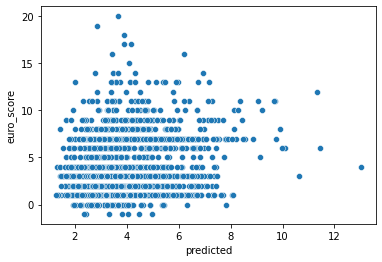

In [28]:
sns.scatterplot(data=val, x="predicted", y="euro_score")

## The Dream Team

In [29]:
fantasy_euro = pd.read_csv("{}/interim/fantasy_euro.csv".format(DATA_DIR))

In [30]:
fantasy_euro.columns = ["player_name", "date", "league_name", "team_name", "opponent_name", "price", "skill", "selected_percentage"]

In [31]:
players = pd.merge(test[["player_name", "position", "team_name", "opponent_name", "predicted", "count_play", "prev_starter_rate", "goal_consistency"]], 
                   fantasy_euro[["player_name", "price", "skill", "selected_percentage"]],
                   how='left', on="player_name")

In [32]:
players["value_for_money"] = players["predicted"] / players["price"]
players["round_predicted"] = players["predicted"].apply(lambda x: round(x))

In [33]:
players = players[~pd.isnull(players['position'])]
players = players[players['prev_starter_rate'] > 0.75]
players = players[players['count_play'] > 3]

In [34]:
players = players.sort_values(by=["round_predicted", "value_for_money"], ascending=False)

In [35]:
gk = players[players["position"] == "GK"]
gk = gk.sort_values(by=["prev_starter_rate","count_play","round_predicted", "value_for_money"], ascending=False)
gk = gk.drop_duplicates(subset=["team_name"], keep="first")
gk = gk.sort_values(by=["round_predicted", "value_for_money"], ascending=False)
gk.head(20)

,player_name,position,team_name,opponent_name,predicted,count_play,prev_starter_rate,goal_consistency,price,skill,selected_percentage,value_for_money,round_predicted
997,Unai Simón,GK,Spain,Sweden,6.162493,6.0,1.0,0.0,5.0,1,1.0,1.232499,6
771,Pavao Pervan,GK,Austria,North Macedonia,4.969031,7.0,1.0,0.0,4.5,1,0.0,1.104229,5
508,Kasper Schmeichel,GK,Denmark,Finland,4.812367,24.0,1.0,0.0,5.0,1,20.0,0.962473,5
865,Rui Patrício,GK,Portugal,Hungary,4.883997,19.0,1.0,0.0,5.5,1,7.0,0.887999,5
460,Jordan Pickford,GK,England,Croatia,4.839115,7.0,1.0,0.0,5.5,1,3.0,0.879839,5
420,Jasper Cillessen,GK,Netherlands,Ukraine,4.737850,12.0,1.0,0.0,5.5,1,4.0,0.861427,5
336,Gianluigi Donnarumma,GK,Italy,Turkey,4.700285,19.0,1.0,0.0,5.5,1,25.0,0.854597,5
952,Thibaut Courtois,GK,Belgium,Russia,5.027414,18.0,1.0,0.0,6.0,1,27.0,0.837902,5
370,Hugo Lloris,GK,France,Germany,4.716008,19.0,1.0,0.0,6.0,1,8.0,0.786001,5
802,Péter Gulácsi,GK,Hungary,Portugal,4.288640,19.0,1.0,0.0,4.5,1,3.0,0.953031,4


In [36]:
players[players["position"] == "D"].head(20)

,player_name,position,team_name,opponent_name,predicted,count_play,prev_starter_rate,goal_consistency,price,skill,selected_percentage,value_for_money,round_predicted
469,José Gayà,D,Spain,Sweden,6.195773,6.0,0.833333,0.166667,5.0,2,1.0,1.239155,6
765,Pau Torres,D,Spain,Sweden,5.572297,7.0,0.857143,0.142857,4.5,2,17.0,1.238288,6
468,José Fonte,D,Portugal,Hungary,5.781815,10.0,0.900000,0.000000,5.0,2,0.0,1.156363,6
969,Timothy Castagne,D,Belgium,Russia,5.808370,13.0,0.846154,0.153846,5.5,2,6.0,1.056067,6
960,Thomas Meunier,D,Belgium,Russia,5.665334,16.0,0.875000,0.062500,5.5,2,9.0,1.030061,6
971,Toby Alderweireld,D,Belgium,Russia,5.577988,24.0,1.000000,0.083333,5.5,2,4.0,1.014180,6
367,Henrik Dalsgaard,D,Denmark,Finland,5.470607,6.0,1.000000,0.000000,4.5,2,0.0,1.215690,5
105,Bartosz Bereszynski,D,Poland,Slovakia,5.295622,19.0,0.894737,0.000000,4.5,2,0.0,1.176805,5
781,Pepe,D,Portugal,Hungary,5.188134,14.0,1.000000,0.071429,5.0,2,5.0,1.037627,5
922,Stefan Lainer,D,Austria,North Macedonia,5.148278,21.0,0.952381,0.047619,5.0,2,0.0,1.029656,5


In [37]:
players[(players["position"] == "M")].head(20)

,player_name,position,team_name,opponent_name,predicted,count_play,prev_starter_rate,goal_consistency,price,skill,selected_percentage,value_for_money,round_predicted
514,Kevin De Bruyne,M,Belgium,Russia,10.545305,12.0,1.000000,0.416667,10.5,3,33.0,1.004315,11
264,Eden Hazard,M,Belgium,Russia,9.230335,14.0,1.000000,0.357143,10.0,3,3.0,0.923033,9
632,Marko Arnautovic,M,Austria,North Macedonia,5.780003,15.0,0.866667,0.266667,7.0,4,2.0,0.825715,6
254,Dries Mertens,M,Belgium,Russia,6.090855,21.0,0.904762,0.285714,9.0,4,3.0,0.676762,6
123,Bernardo Silva,M,Portugal,Hungary,5.546532,25.0,0.880000,0.200000,8.5,3,2.0,0.652533,6
457,Jordan Henderson,M,England,Croatia,5.074256,6.0,0.833333,0.000000,6.0,3,1.0,0.845709,5
530,Konrad Laimer,M,Austria,North Macedonia,4.933901,7.0,1.000000,0.142857,6.0,3,0.0,0.822317,5
840,Robert Skov,M,Denmark,Finland,5.437011,9.0,0.888889,0.444444,7.0,3,0.0,0.776716,5
988,Toni Kroos,M,Germany,France,5.060080,15.0,1.000000,0.200000,7.0,3,6.0,0.722869,5
1030,Xherdan Shaqiri,M,Switzerland,Wales,4.995198,15.0,0.800000,0.133333,7.0,3,2.0,0.713600,5


In [38]:
players[players["position"] == "F"].head(30)

,player_name,position,team_name,opponent_name,predicted,count_play,prev_starter_rate,goal_consistency,price,skill,selected_percentage,value_for_money,round_predicted
860,Romelu Lukaku,F,Belgium,Russia,8.503023,16.0,1.000000,0.812500,11.0,4,42.0,0.773002,9
177,Cristiano Ronaldo,F,Portugal,Hungary,7.274648,19.0,0.947368,0.526316,12.0,4,26.0,0.606221,7
361,Haris Seferovic,F,Switzerland,Wales,5.658160,19.0,0.842105,0.368421,8.5,4,0.0,0.665666,6
79,Antoine Griezmann,F,France,Germany,6.368346,28.0,0.928571,0.357143,11.0,4,3.0,0.578941,6
667,Memphis Depay,F,Netherlands,Ukraine,4.534816,24.0,1.000000,0.416667,10.0,4,15.0,0.453482,5
1059,Ádám Szalai,F,Hungary,Portugal,3.807839,24.0,0.958333,0.291667,6.0,4,0.0,0.634640,4
62,Andrej Kramaric,F,Croatia,England,4.001083,13.0,0.769231,0.307692,6.5,4,1.0,0.615551,4
637,Martin Braithwaite,F,Denmark,Finland,3.974829,24.0,0.875000,0.291667,7.5,4,1.0,0.529977,4
742,Olivier Giroud,F,France,Germany,3.998292,26.0,0.769231,0.423077,8.0,4,1.0,0.499786,4
137,Breel Embolo,F,Switzerland,Wales,3.991657,13.0,1.000000,0.153846,8.0,4,0.0,0.498957,4


In [39]:
my_team = ["Romelu Lukaku", "Marko Arnautovic", "Memphis Depay"]